In [1]:
import sqlite3 as sql
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
tracks_final = pd.read_csv('tracks_df.csv')
html_final = pd.read_csv('html_df.csv')
json_final = pd.read_csv('json_df.csv')

In [4]:
tracks_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586601 entries, 0 to 586600
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          586601 non-null  object 
 1   track_name        586601 non-null  object 
 2   popularity        586601 non-null  int64  
 3   duration_ms       586601 non-null  int64  
 4   explicit          586601 non-null  int64  
 5   artist_name       586601 non-null  object 
 6   artist_id         586601 non-null  object 
 7   release_date      586601 non-null  object 
 8   danceability      586601 non-null  float64
 9   energy            586601 non-null  float64
 10  loudness          586601 non-null  float64
 11  speechiness       586601 non-null  float64
 12  acousticness      586601 non-null  float64
 13  instrumentalness  586601 non-null  float64
 14  liveness          586601 non-null  float64
 15  valence           586601 non-null  float64
dtypes: float64(8), int64

In [5]:
html_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ArtistName             1000 non-null   object
 1   Lead_Streams           1000 non-null   int64 
 2   Tracks                 1000 non-null   object
 3   1billion_plus_views    1000 non-null   int64 
 4   100million_plus_views  1000 non-null   int64 
 5   10million_plus_views   1000 non-null   int64 
 6   1million_plus_views    1000 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 54.8+ KB


In [6]:
json_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1737 entries, 0 to 1736
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   follower_count     1737 non-null   int64 
 1   genres             1737 non-null   object
 2   id                 1737 non-null   object
 3   images             1737 non-null   object
 4   name               1737 non-null   object
 5   artist_popularity  1737 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 81.5+ KB


In [7]:
conn = sql.connect('spotify.db')
tracks_final.to_sql('tracks', conn)
html_final.to_sql('html', conn)
json_final.to_sql('json', conn)

In [8]:
cursor = conn.cursor()

In [9]:
cursor.execute("SELECT * FROM tracks")

In [10]:
#print("tracks details list:")
#results = cursor.fetchall()
#for row in results:
#    print(row)

In [11]:
sql = '''SELECT * from tracks INNER JOIN json ON tracks.artist_id = json.id'''


In [12]:
#Executing the query
cursor.execute(sql)



In [13]:
#Fetching 1st row from the table
csv_json = pd.DataFrame(cursor.fetchall())
csv_json.columns = [x[0] for x in cursor.description]
csv_json.head()

,index,track_id,track_name,popularity,duration_ms,explicit,artist_name,artist_id,release_date,danceability,...,instrumentalness,liveness,valence,index,follower_count,genres,id,images,name,artist_popularity
0,152,7lRFR5GJCxK87ZbVMtQSeS,Ain't Misbehavin',28,192600,0,Louis Armstrong,19eLuQmk9aCobbVDHc6eek,1923,0.665,...,0.00217,0.6440,0.503,33,2284477,"['adult standards', 'dixieland', 'harlem renai...",19eLuQmk9aCobbVDHc6eek,"[{'height': 1176, 'url': 'https://i.scdn.co/im...",Louis Armstrong,75
1,171,5WlMyDvyQedom0kQ3MCTow,Lazy River,14,182707,0,Louis Armstrong,19eLuQmk9aCobbVDHc6eek,1923,0.571,...,0.01290,0.1210,0.490,33,2284477,"['adult standards', 'dixieland', 'harlem renai...",19eLuQmk9aCobbVDHc6eek,"[{'height': 1176, 'url': 'https://i.scdn.co/im...",Louis Armstrong,75
2,177,3U6L5KW48YOsksN9Qvlydl,I've Got The World On A String,11,195000,0,Louis Armstrong,19eLuQmk9aCobbVDHc6eek,1923,0.544,...,0.02560,0.4010,0.411,33,2284477,"['adult standards', 'dixieland', 'harlem renai...",19eLuQmk9aCobbVDHc6eek,"[{'height': 1176, 'url': 'https://i.scdn.co/im...",Louis Armstrong,75
3,184,1v6v5llnekLbreJYIRfkKc,Chicago Breakdown,8,203307,0,Louis Armstrong,19eLuQmk9aCobbVDHc6eek,1923,0.604,...,0.84000,0.1950,0.629,33,2284477,"['adult standards', 'dixieland', 'harlem renai...",19eLuQmk9aCobbVDHc6eek,"[{'height': 1176, 'url': 'https://i.scdn.co/im...",Louis Armstrong,75
4,187,300WVfsVnOUJM2KXAm9IGS,Stardust,8,205533,0,Louis Armstrong,19eLuQmk9aCobbVDHc6eek,1923,0.717,...,0.43900,0.0609,0.889,33,2284477,"['adult standards', 'dixieland', 'harlem renai...",19eLuQmk9aCobbVDHc6eek,"[{'height': 1176, 'url': 'https://i.scdn.co/im...",Louis Armstrong,75


In [14]:
csv_json.drop(columns=['index'], inplace=True)

In [15]:
csv_json.to_sql('csv_json', conn)

In [16]:
sql = '''SELECT * from csv_json INNER JOIN html ON lower(csv_json.name) = lower(html.ArtistName)'''

In [17]:
#Executing the query
cursor.execute(sql)

In [18]:
#Fetching 1st row from the table
final = pd.DataFrame(cursor.fetchall())
final.columns = [x[0] for x in cursor.description]
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40749 entries, 0 to 40748
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  40749 non-null  int64  
 1   track_id               40749 non-null  object 
 2   track_name             40749 non-null  object 
 3   popularity             40749 non-null  int64  
 4   duration_ms            40749 non-null  int64  
 5   explicit               40749 non-null  int64  
 6   artist_name            40749 non-null  object 
 7   artist_id              40749 non-null  object 
 8   release_date           40749 non-null  object 
 9   danceability           40749 non-null  float64
 10  energy                 40749 non-null  float64
 11  loudness               40749 non-null  float64
 12  speechiness            40749 non-null  float64
 13  acousticness           40749 non-null  float64
 14  instrumentalness       40749 non-null  float64
 15  li

In [19]:
final.drop(columns=['index'], inplace=True)

In [20]:
final.to_sql('spotify_final', conn)

In [21]:
cursor.execute("SELECT * FROM spotify_final")

print("final table:")
results = cursor.fetchmany(10)
for row in results:
    print(row)   

In [22]:
final['release_date'] = pd.to_datetime(final['release_date'])
final['year'] = final.apply(lambda row: row.release_date.year, axis = 1)

###### Data Visualization

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

###### Pairwise correlation between selected attributes

<Figure size 1440x864 with 0 Axes>

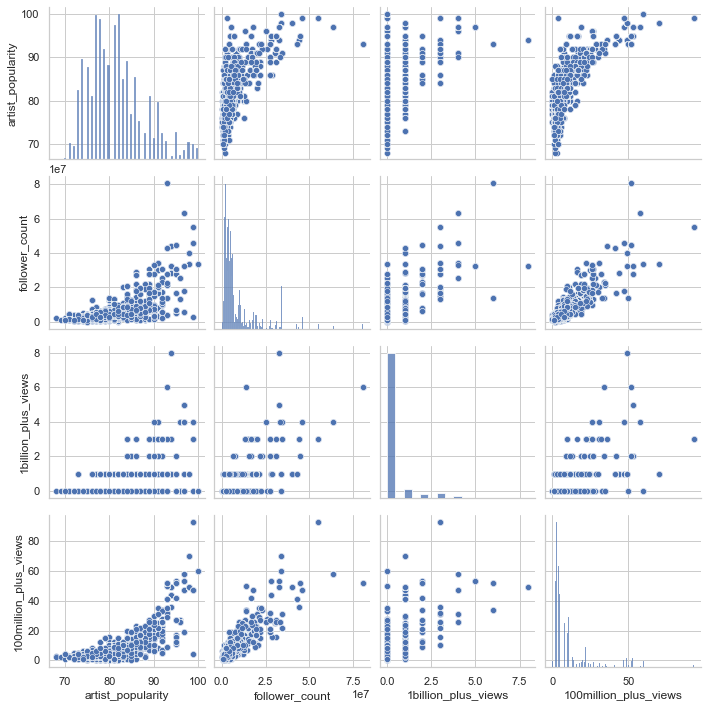

In [24]:
#Artist popularity and follower count against views benchmark
plt.figure(figsize=(20, 12))
sns.set(style="whitegrid")
cols = ["artist_popularity","follower_count","1billion_plus_views","100million_plus_views" ]
sns.pairplot(final[cols], height = 2.5 )
plt.show()

From the above chart we see that follower count and views counts are positively correlated. Same with artist popularity.

<Figure size 1440x864 with 0 Axes>

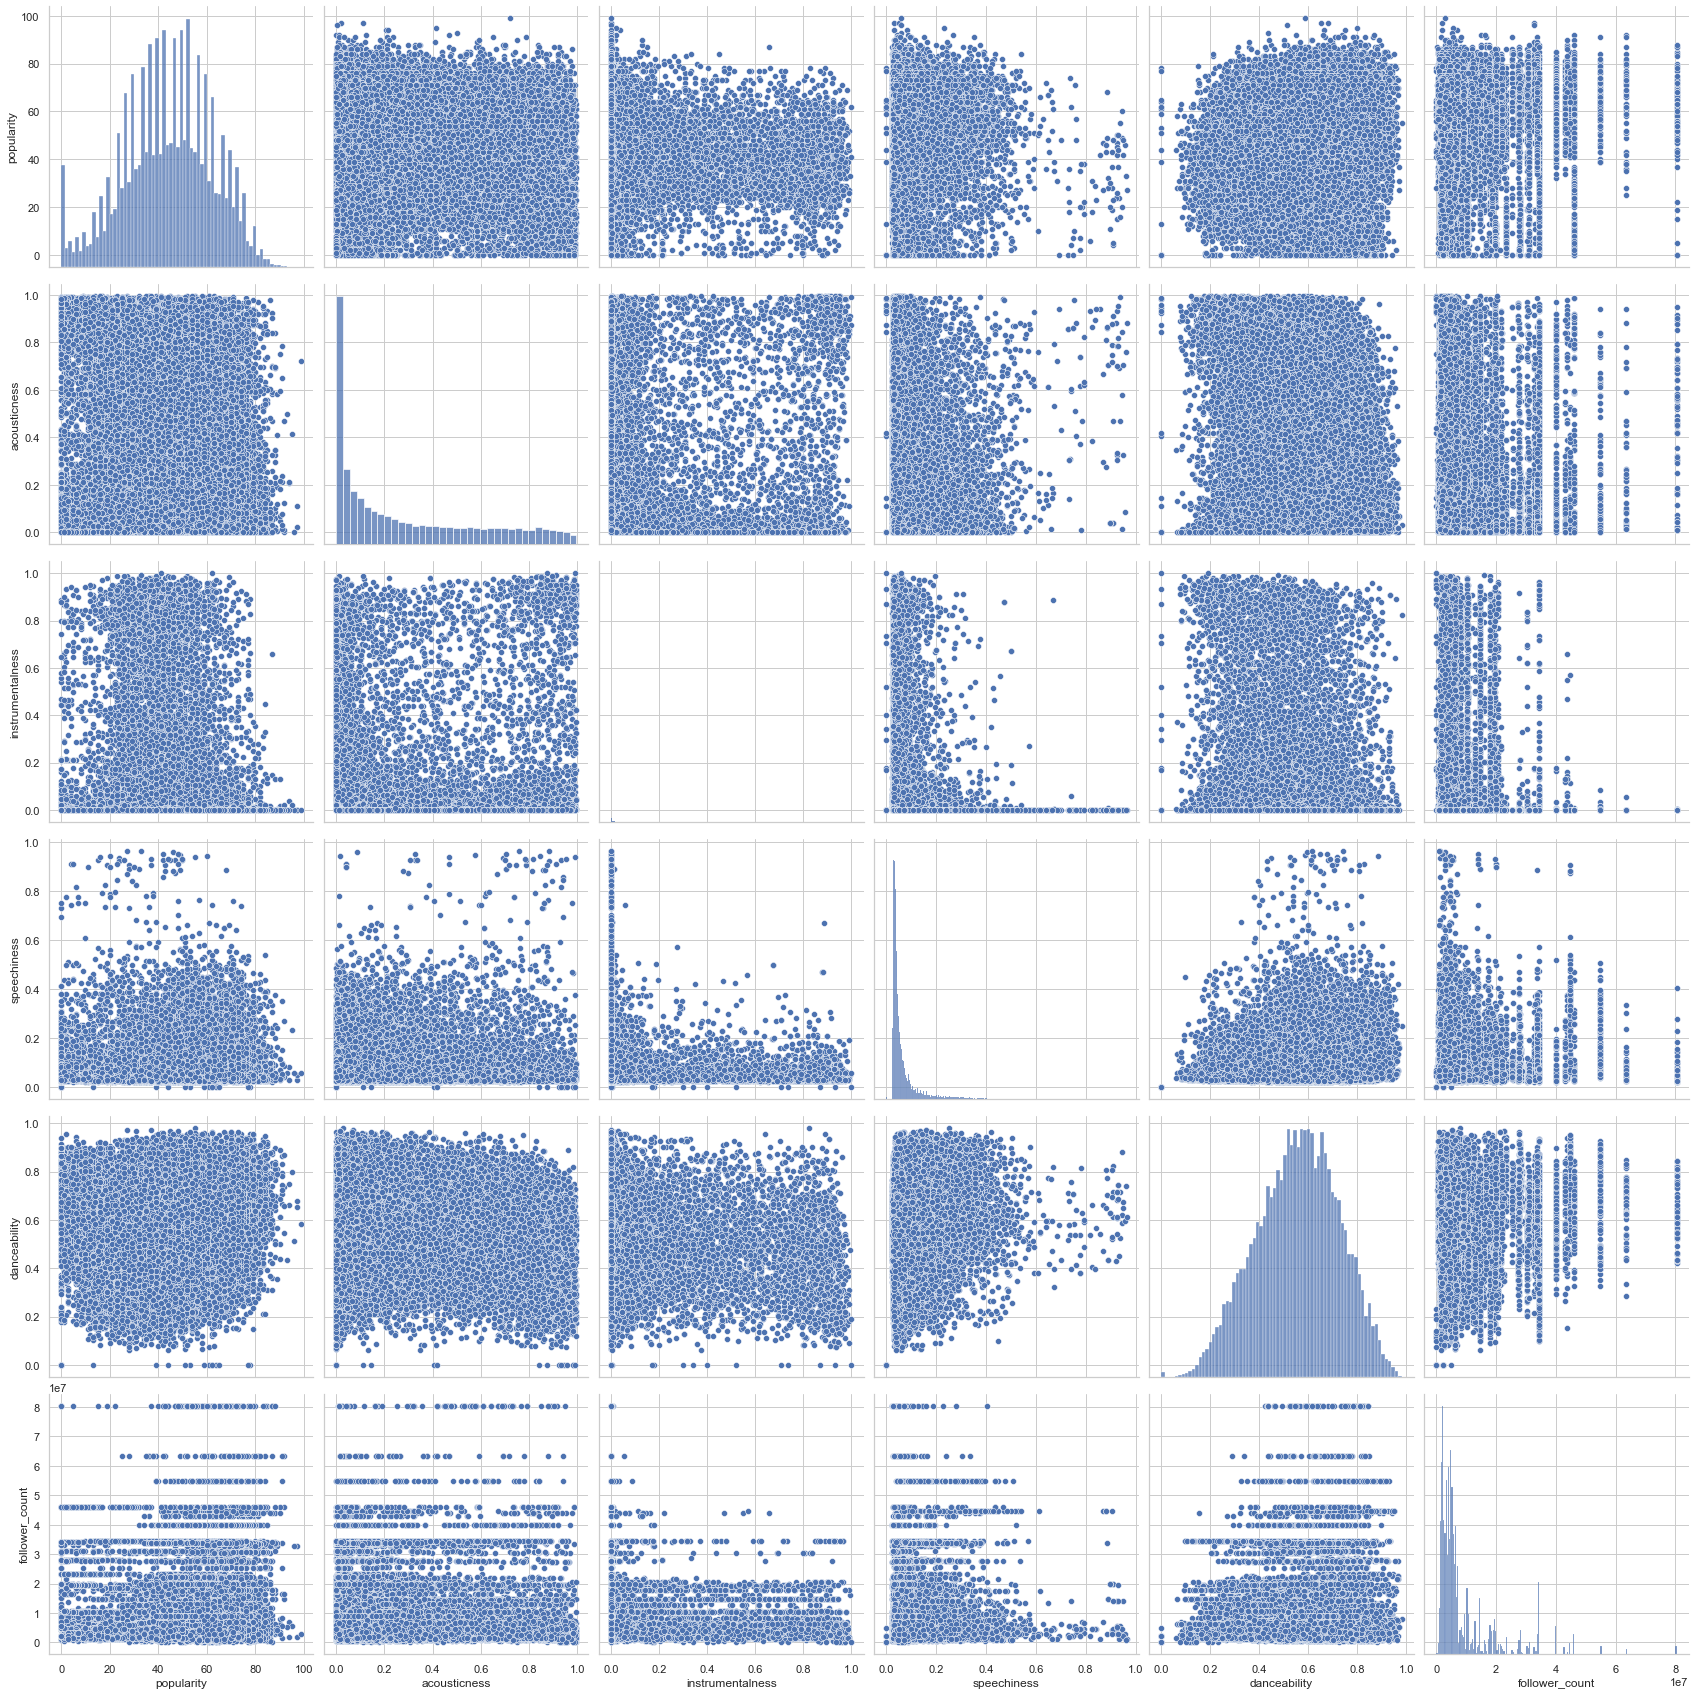

In [25]:
# Popularity of tracks with respect to the various features
plt.figure(figsize=(20, 12))
sns.set(style="whitegrid")
cols = ["popularity","acousticness","instrumentalness","speechiness","danceability","follower_count"]
sns.pairplot(final[cols], height = 4 )
plt.show()

From the above pair plots I could see low speechiness(songs which have low/no speech) has high track popularity and rest of the attributes has no correlation with popularity

###### heatmap

<AxesSubplot:>

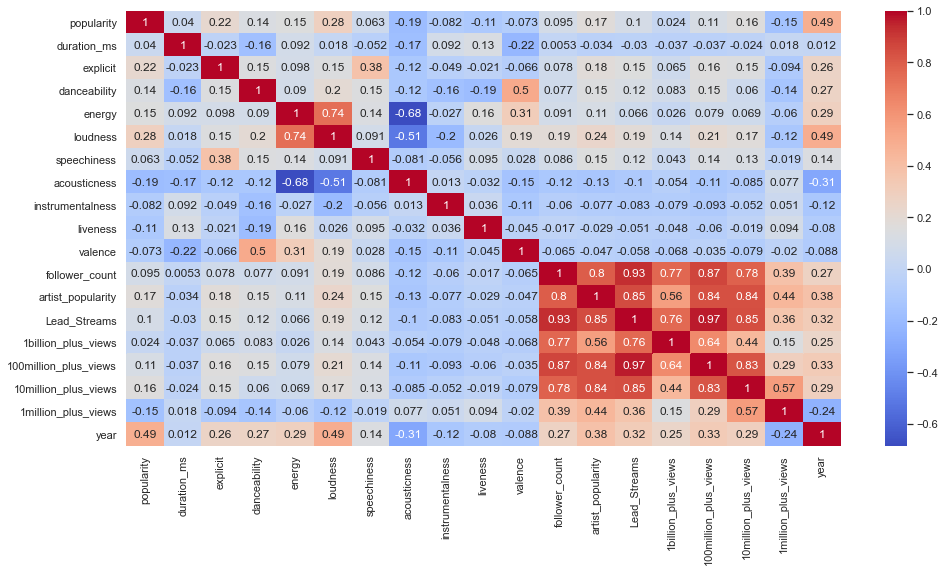

In [26]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
corr = final.corr()
sns.heatmap(corr,annot=True,cmap="coolwarm")

From number shows that follower count is highly correlated with attributes like artist popularity, milestone views like 1billion,100 million etc

###### Top 20 tracks and their popularity

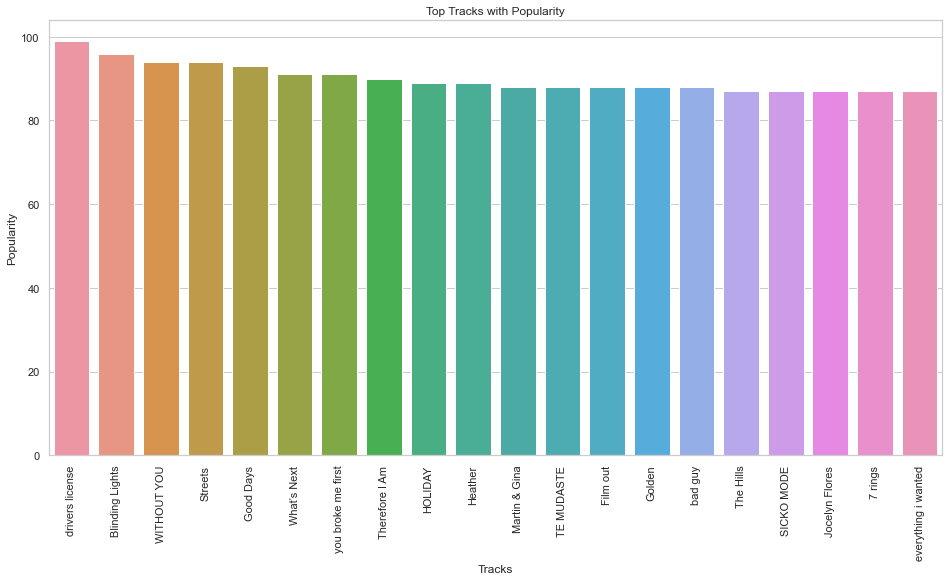

In [27]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
x = final.groupby("track_name")["popularity"].mean().sort_values(ascending=False).head(20)
ax = sns.barplot(x.index, x)
ax.set_title('Top Tracks with Popularity')
ax.set_ylabel('Popularity')
ax.set_xlabel('Tracks')
plt.xticks(rotation = 90)
plt.show()

###### Top 20 artists with popularity

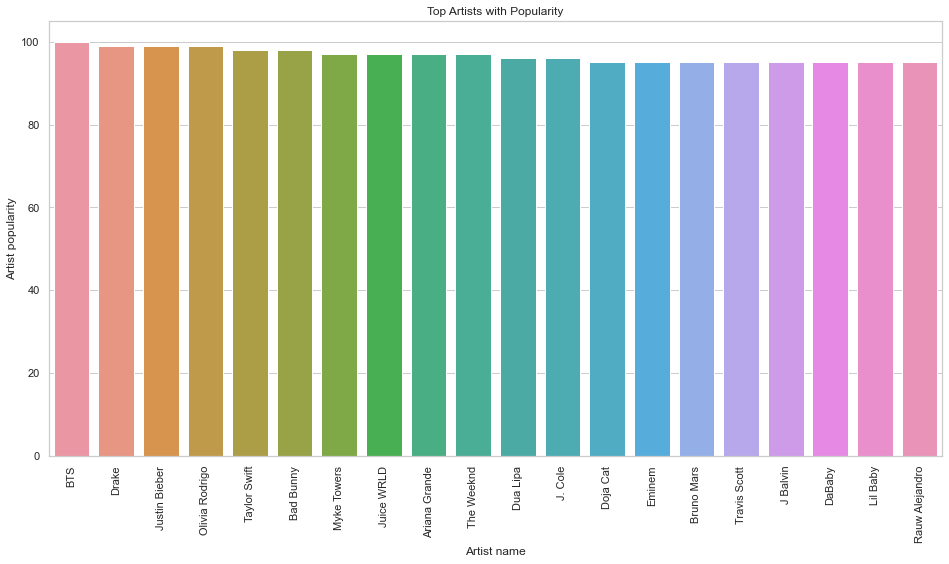

In [28]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
x = final.groupby("artist_name")["artist_popularity"].mean().sort_values(ascending=False).head(20)
ax = sns.barplot(x.index, x)
ax.set_title('Top Artists with Popularity')
ax.set_ylabel('Artist popularity')
ax.set_xlabel('Artist name')
plt.xticks(rotation = 90)
plt.show()

BTS is the most popular band with popularity score 100. BTS are a part of Korean popular music or better known as K Pop. It’s a music genre that blends together electronic, Hip-Hop, Pop, Rock, R&B and even Rap.

###### Audio characteristics over tracks popularity

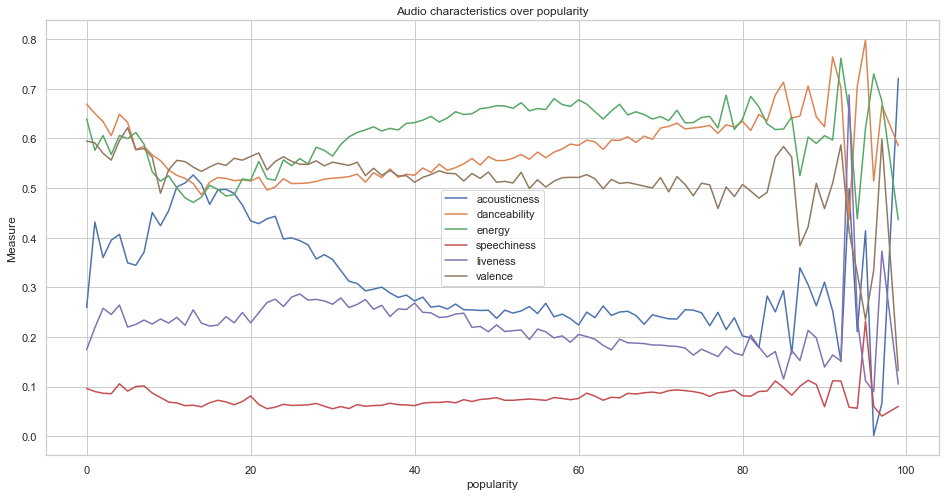

In [29]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]
for col in columns:
    x = final.groupby("popularity")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Audio characteristics over popularity')
ax.set_ylabel('Measure')
ax.set_xlabel('popularity')
plt.show()

###### top10 artists who sang more songs than others

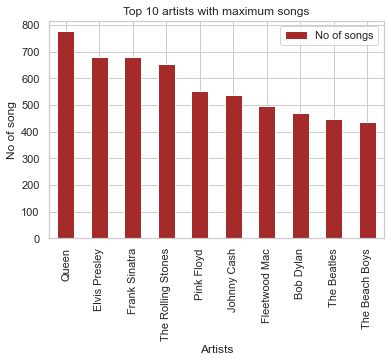

In [30]:
Top10 = pd.DataFrame({'No of songs':final['artist_name'].value_counts().head(10)})
Top10.plot.bar(color='brown')
plt.title('Top 10 artists with maximum songs')
plt.xlabel('Artists')
plt.ylabel('No of song')
plt.show()

Queen Rockband has the highest number of songs on spotify.The number is close to 800.
Elvis Presley and Frank Sinatra takes number 2 spot.

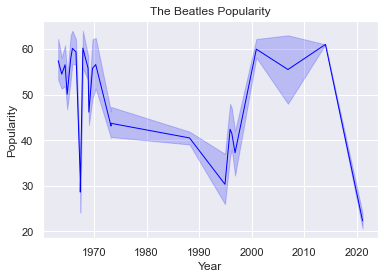

In [31]:
# lets analyze the popularity of The Beatles songs over the year
Beatles = final[final['artist_name'] == 'The Beatles']
# grid
sns.set(style='darkgrid')
# line plot passing x,y
sns.lineplot(x='release_date', y='popularity',lw = 1, data=Beatles, color='blue')
# Labels
plt.title("The Beatles Popularity")
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.show()

Over last few decades Beatles was quite popular band. But its popularity plunged after 2013 to the lowest low.

###### lets analyze which features of songs is affecting popularity in Beatles songs

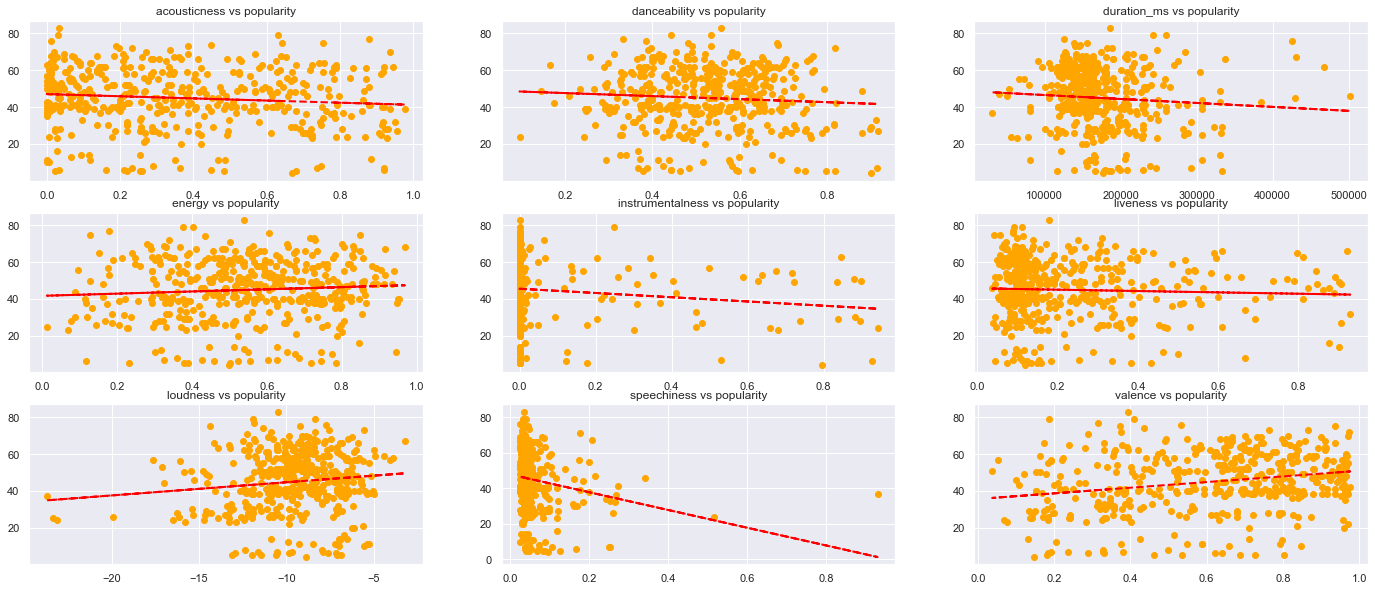

In [32]:
plt.figure(0, figsize=(24,10))
Beatles = final[final['artist_name'] == 'The Beatles']
x_axis = ['acousticness','danceability', 'duration_ms', 'energy', 'instrumentalness','liveness', 'loudness', 'speechiness', 'valence']
z = 0
for i in range(3):
    for j in range(3):
        # values to be plotted on axis(x,y)
        x = Beatles[x_axis[z]].values.reshape(-1,1)
        y = Beatles["popularity"].values.reshape(-1,1)
        # linear model 
        regr = linear_model.LinearRegression()
        regr.fit(x, y)
        # sub-plot
        ax = plt.subplot2grid((3,3), (i,j))
        ax.scatter(x,y, c='orange')
        # adding trend line
        ax.plot(x, regr.predict(x), color="red", linewidth=2, linestyle='--')
        # adding title
        ax.title.set_text(f'{x_axis[z]} vs popularity')
        z += 1
plt.show()

Speechiness of beetles tracks are negatively correlated to popularity, but rest of the attributes are not correlated to popularity of the tracks.

###### Top 10 artists with number of tracks crossing billion plus views

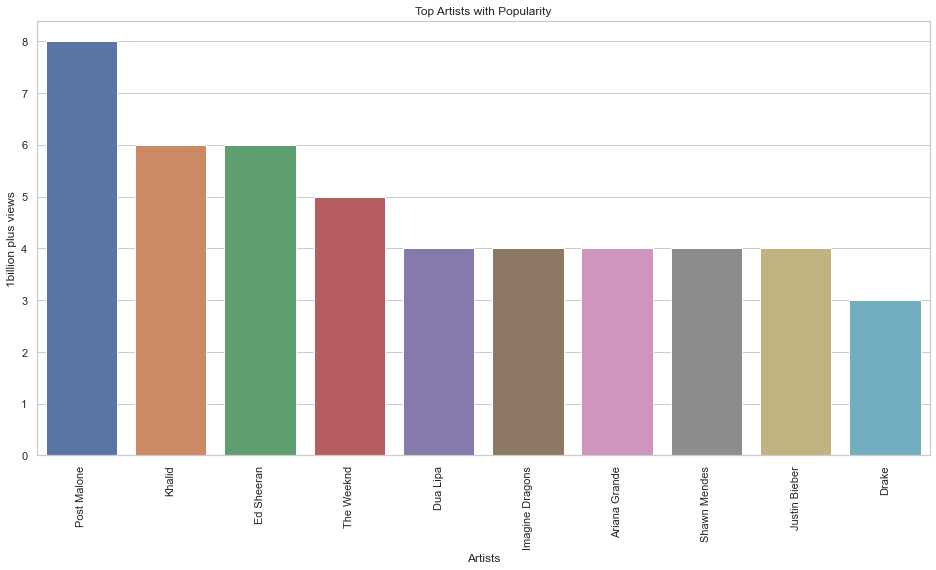

In [33]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
x = final.groupby("artist_name")["1billion_plus_views"].mean().sort_values(ascending=False).head(10)
ax = sns.barplot(x.index, x)
ax.set_title('Top Artists with Popularity')
ax.set_ylabel('1billion plus views')
ax.set_xlabel('Artists')
plt.xticks(rotation = 90)
plt.show()

Post Malone has the highest of 8 tracks crossing 1 billion views. Khalid and Ed Sheeran stands at second place with 6 tracks crossing 1 billion.

In [34]:
import os
os.remove('spotify.db')

In [35]:
conn.close()